In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# $\star$ Question 2: 
Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues. Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

# Question 2.1: Mean and Covariance estimation 
Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.

In [3]:
gaussian = np.load("/Users/tintin/Documents/ALU/ss_2022/statistical_pattern_recognition/spr-exercises/data/gaussian.npz")["arr_0"]
N = gaussian.shape[0]
print(f"Number of Observations: {N}")

Number of Observations: 100


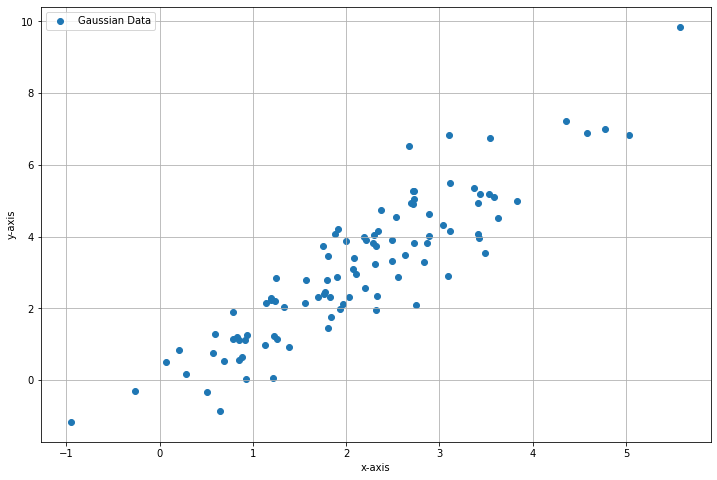

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(gaussian[:, 0], gaussian[:, 1], label="Gaussian Data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()
plt.legend()
plt.show()

In [5]:
# Mean via ML estimation
mu_ml = np.sum(gaussian, axis=0) / N
# Mean via numpy
mu_np = np.mean(gaussian, axis=0)

print(f"Mean from ML estimation: {mu_ml}")
print(f"Mean from Numpy Library: {mu_np}")

Mean from ML estimation: [2.12308534 3.12168402]
Mean from Numpy Library: [2.12308534 3.12168402]


In [6]:
# Covariance via ML estimation
cov_ml = (1 / N) * np.matmul((gaussian - mu_ml).T, (gaussian - mu_ml))
# Covariance via Numpy
cov_np = np.cov(gaussian.T)

print(f"Covariance from ML estimation: \n {cov_ml}")
print(f"Covariance from Numpy Library: \n {cov_np}")

Covariance from ML estimation: 
 [[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]
Covariance from Numpy Library: 
 [[1.35117126 2.10306646]
 [2.10306646 4.02666029]]


# Question 2.2: Plotting the graph
Plot the points and indicate the mean via a cross and the covariance via an
ellipse

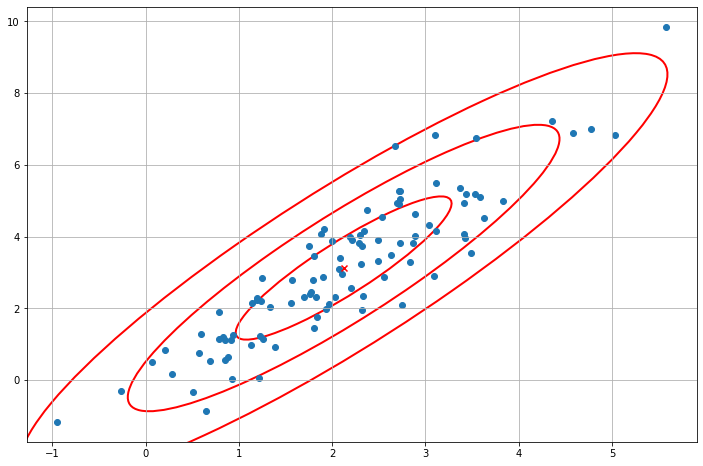

In [7]:
# Get eigen values
eig_w, eig_v = np.linalg.eig(cov_ml)

fig, ax = plt.subplots(figsize=(12,8))

for i in range(3):
    ell = Ellipse(xy=mu_ml, width=np.sqrt((eig_w[0]))*2*(i+1), height=np.sqrt((eig_w[1]))*2*(i+1), angle=np.rad2deg(np.arccos(eig_v[0, 0])), edgecolor='red', lw=2, facecolor='none')
    ax.add_artist(ell)

plt.scatter(gaussian[:, 0], gaussian[:, 1])
plt.scatter(mu_ml[0], mu_ml[1], c="red", marker="x")
plt.grid()
plt.show()

# $\star\star$ Question 3:
Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come
in.

# Question 3.1: Using the correct prior
Using   $\mu_0 = (2,3)^T $



In [13]:
# For first two points
reduced_2 = gaussian[:2, :]
ml_mean_2 = np.mean(reduced_2, axis=0) 
prior_cov = cov_ml
prior_mean = np.array([2, 3])

cov_2 = np.linalg.inv(np.linalg.inv(prior_cov) + 2*np.linalg.inv(cov_ml))

map_mean_2 = cov_2 @ (2*np.linalg.inv(cov_ml) @ ml_mean_2 + np.linalg.inv(cov_ml) @ prior_mean)

print(f"ML Mean: {ml_mean_2}")
print(f"MAP Mean: {map_mean_2}")


ML Mean: [3.18577608 4.75802822]
MAP Mean: [2.79051738 4.17201882]


In [41]:
def estimate_means(gaussian, n, cov, prior_mean):
    gaussian_n = gaussian[:n, :]
    ml_mean_n = np.mean(gaussian_n, axis=0)
    prior_cov = cov

    cov_n = np.linalg.inv(np.linalg.inv(prior_cov) + n * np.linalg.inv(cov))

    map_mean_n = cov_n @ (n * np.linalg.inv(cov) @ ml_mean_n + np.linalg.inv(cov) @ prior_mean)

    return ml_mean_n, map_mean_n


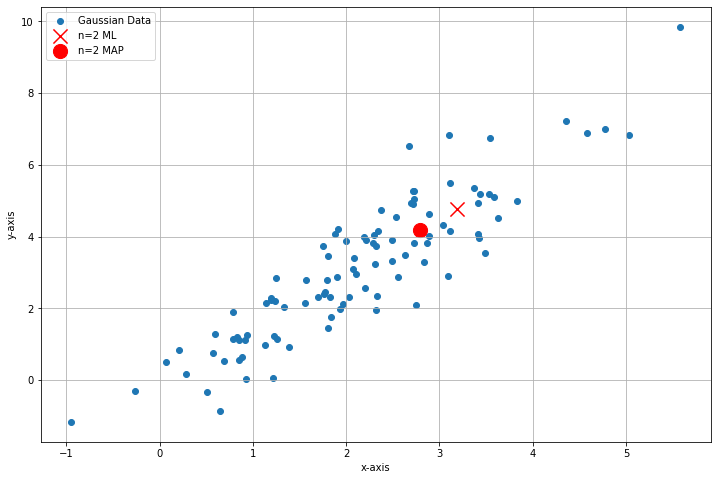

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(gaussian[:, 0], gaussian[:, 1], label="Gaussian Data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()


plt.scatter(ml_mean_2[0], ml_mean_2[1], label="n=2 ML", c="r", marker="x", s=200)
plt.scatter(map_mean_2[0], map_mean_2[1], label="n=2 MAP", c="r", marker="o", s=200)

plt.legend()

plt.show()

In [39]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
def get_color(i):
    return color_cycle[i % len(color_cycle)]

In [43]:
def plot_means(gaussian, ns, prior_mean, ml_mean):
    plt.figure(figsize=(12, 8))
    plt.scatter(gaussian[:, 0], gaussian[:, 1], label="Gaussian Data")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.grid()

    plt.scatter(ml_mean[0], ml_mean[1], label="ML mean", c=get_color(0), marker="o", s=200)
    plt.scatter(prior_mean[0], prior_mean[1], label="Prior mean", c=get_color(1), marker="x", s=200)


    for i, n in enumerate(ns):
        ml_mean, map_mean = estimate_means(gaussian, n, cov_ml, prior_mean)
        plt.scatter(ml_mean[0], ml_mean[1], label=f"n={n} ML", c=get_color(i + 2), marker="o", s=200)
        plt.scatter(map_mean[0], map_mean[1], label=f"n={n} MAP", c=get_color(i + 2), marker="x", s=200)
    
    plt.legend()
    plt.show()

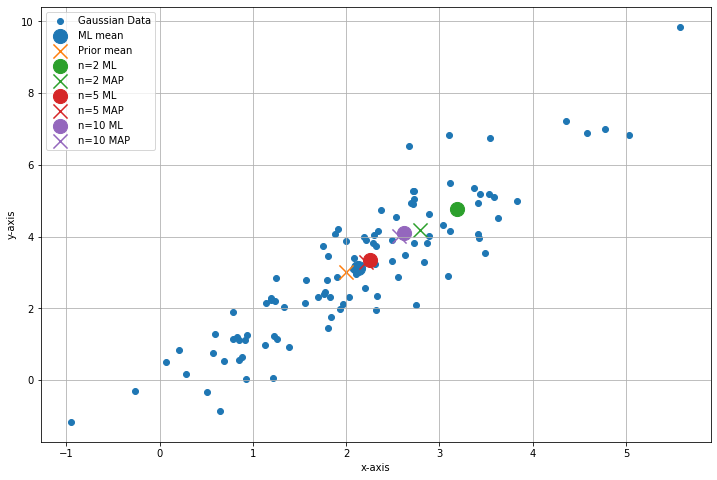

In [44]:
prior_mean = np.array([2, 3])

plot_means(gaussian, [2, 5, 10], prior_mean, mu_ml)

# Question 3.2: Using a slightly wrong prior
Using $\mu_0 = (2,5)^T $

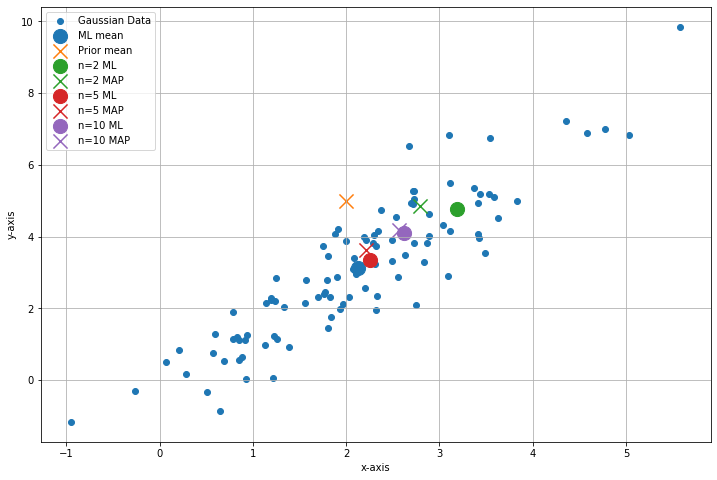

In [45]:
wrong_prior = np.array([2, 5])

plot_means(gaussian, [2, 5, 10], wrong_prior, mu_ml)

# $\star$ Question 4:
Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show
the result. How well does the estimate reflect the true data?

In [47]:
gaussianplus = np.load("/Users/tintin/Documents/ALU/ss_2022/statistical_pattern_recognition/spr-exercises/data/gaussianplus.npz")["arr_0"]
N = gaussianplus.shape[0]
print(f"Number of Observations: {N}")

Number of Observations: 120


In [49]:
mu_ml = np.sum(gaussianplus, axis=0) / N
print(f"Mean from ML estimation: {mu_ml}")

Mean from ML estimation: [2.78150432 3.4206865 ]


In [51]:
cov_ml = (1 / N) * np.matmul((gaussianplus - mu_ml).T, (gaussianplus - mu_ml))
print(f"Covariance from ML estimation: \n {cov_ml}")


Covariance from ML estimation: 
 [[3.37496477 2.68822246]
 [2.68822246 3.8456476 ]]


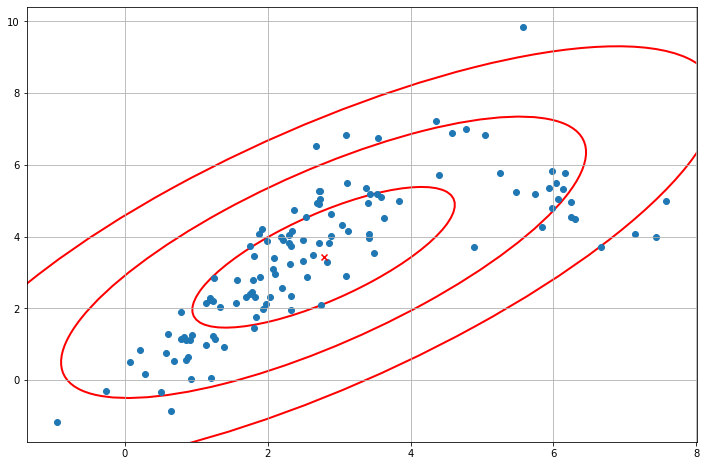

In [52]:
eig_w, eig_v = np.linalg.eig(cov_ml)

fig, ax = plt.subplots(figsize=(12,8))

for i in range(3):
    ell = Ellipse(xy=mu_ml, width=np.sqrt((eig_w[0]))*2*(i+1), height=np.sqrt((eig_w[1]))*2*(i+1), angle=np.rad2deg(np.arccos(eig_v[0, 0])), edgecolor='red', lw=2, facecolor='none')
    ax.add_artist(ell)

plt.scatter(gaussianplus[:, 0], gaussianplus[:, 1])
plt.scatter(mu_ml[0], mu_ml[1], c="red", marker="x")
plt.grid()
plt.show()